In [1]:
import pandas as pd
import analysis_util
import matplotlib.pyplot as plt

In [2]:
data_folder = "/Users/heleno/Documents/data"
all_chunks_attributes = pd.read_csv(f'{data_folder}/dataset_attributes.csv')

In [3]:
all_chunks_attributes.head(5)

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,...,Same devs,Devs intersection,Commits 1,Commits 2,Changed files 1,Changed files 2,Changed files intersection,self_conflict_perc,has_branch_merge_message_indicator,has_multiple_devs_on_each_side
0,776661,Version 1,94,98,96,If statement,https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,...,0.0,0.0,1.0,59.0,3.0,281.0,1.0,0.0,0.0,0.0
1,776662,Combination,80,100,87,"If statement, Method invocation, Return statem...",https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,...,0.0,0.0,2.0,16.0,8.0,118.0,1.0,0.5,1.0,0.0
2,776697,Version 2,70,132,131,"Attribute, Method invocation",https://github.com/bndtools/bndtools,bndtools/bndtools,bndtools,bndtools,...,0.0,0.0,1.0,121.0,1.0,243.0,1.0,NaN,0.0,0.0
3,776700,Version 1,304,354,322,"Comment, For statement, If statement, Method i...",https://github.com/bndtools/bndtools,bndtools/bndtools,bndtools,bndtools,...,1.0,1.0,12.0,7.0,113.0,62.0,1.0,1.0,0.0,0.0
4,776710,Version 2,125,131,128,Method invocation,https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,2.0,1.0,51.0,6.0,293.0,5.0,1.0,1.0,1.0,1.0


In [4]:
df = pd.read_csv(f'{data_folder}/resolution_composition.csv')
print(len(df))
df.head()

13573


,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0


In [5]:
df_po = pd.read_csv(f'{data_folder}/partial_order_result.csv')
df = pd.merge(df, df_po, on='chunk_id', how='inner', suffixes=('', ''))
df.head()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0,True,18,12
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0,True,113,101
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0,True,6,5
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0,True,5,3
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0,True,6,5


In [6]:
malformed_chunks = pd.read_csv(f'{data_folder}/malformed_chunks.csv')
malformed_chunks = malformed_chunks['chunk_id'].unique()
print(f'Removing {len(malformed_chunks)} malformed chunks')
df = df[~df['chunk_id'].isin(malformed_chunks)]
print(f'Total number of chunks: {len(df)}')

Removing 264 malformed chunks
Total number of chunks: 13309


In [7]:
# remove imprecise resolutions
df = df[df['v1_percentage']!= -1]
print(len(df))

10726


In [8]:
# remove implicit forks
df = analysis_util.filter_implicit_forks(df)
print(f'New total number of chunks: {len(df)}')

Total projects:  1082
Filtered 6 of 1082 projects for being implicit forks: {'RealVNC/android-frameworks-base-with-screenshot-tweaks', 'IceColdSandwich/android_frameworks_base', 'adetaylor/android-frameworks-base-with-remote-control-service', 'cgjones/android-frameworks-base', 'allwinner-ics/platform_frameworks_base', 'AOKP/frameworks_base_disabled'}
Total valid projects:  1076
New total number of chunks: 10177


In [9]:
df.describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,1.017700e+04,10177.00000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.00000,10177.000000,10177.000000,10177.000000,10177.000000
mean,1.097355e+06,0.55345,0.533306,0.510045,0.489930,0.086609,1.823622,2.175789,32.502489,36.404496,6.79493,6.965216,0.170286,15.298418,8.516164
std,2.119343e+05,0.31901,0.320762,0.304105,0.304072,0.198059,6.835704,10.463504,29.994432,30.863874,30.51060,33.251309,20.674248,68.754593,36.407157
min,7.766620e+05,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-388.000000,2.000000,1.000000
25%,9.398230e+05,0.33000,0.330000,0.330000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,2.000000,-2.000000,4.000000,2.000000
50%,1.064856e+06,0.50000,0.500000,0.500000,0.500000,0.000000,1.000000,1.000000,33.330000,40.000000,2.00000,3.000000,0.000000,6.000000,3.000000
75%,1.258354e+06,0.81000,0.800000,0.700000,0.670000,0.000000,1.000000,2.000000,50.000000,50.000000,5.00000,5.000000,2.000000,12.000000,7.000000
max,1.658666e+06,1.00000,1.000000,1.000000,1.000000,1.000000,353.000000,689.000000,100.000000,100.000000,1352.00000,1402.000000,1401.000000,2922.000000,1557.000000


In [10]:
all_attributes_selected = all_chunks_attributes[all_chunks_attributes['chunk_id'].isin(list(df['chunk_id']))]
all_attributes_selected

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,...,Same devs,Devs intersection,Commits 1,Commits 2,Changed files 1,Changed files 2,Changed files intersection,self_conflict_perc,has_branch_merge_message_indicator,has_multiple_devs_on_each_side
1,776662,Combination,80,100,87,"If statement, Method invocation, Return statem...",https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,...,0.0,0.0,2.0,16.0,8.0,118.0,1.0,0.5,1.0,0.0
15,776782,Combination,77,193,123,"Attribute, Comment, If statement, Method decla...",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,1.0,1.0,9.0,17.0,162.0,60.0,1.0,1.0,1.0,1.0
16,776793,Combination,914,922,920,"Attribute, Method invocation",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,1.0,1.0,9.0,17.0,162.0,60.0,1.0,1.0,1.0,1.0
22,776828,Combination,295,302,299,Method invocation,https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,2.0,1.0,179.0,18.0,823.0,35.0,1.0,0.5,1.0,1.0
48,776863,Combination,136,144,138,"Method signature, Static initializer",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,2.0,1.0,142.0,27.0,777.0,632.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173521,1652324,Combination,275,280,277,"Method signature, Try statement",https://github.com/gronnbeck/java-cluster-api,gronnbeck/java-cluster-api,gronnbeck,java-cluster-api,...,0.0,0.0,3.0,3.0,39.0,7.0,1.0,0.0,0.0,0.0
173524,1652325,Combination,85,91,88,"If statement, Variable",https://github.com/gronnbeck/java-cluster-api,gronnbeck/java-cluster-api,gronnbeck,java-cluster-api,...,0.0,0.0,3.0,3.0,39.0,7.0,1.0,0.0,0.0,0.0
175600,1658634,Combination,47,62,56,Attribute,https://github.com/xargsgrep/PortKnocker,xargsgrep/PortKnocker,xargsgrep,PortKnocker,...,1.0,2.0,1.0,1.0,412.0,44.0,1.0,1.0,1.0,0.0
175687,1658665,Combination,9,15,12,Attribute,https://github.com/mseiwert/RoM,mseiwert/RoM,mseiwert,RoM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
kinds_conflict = []
for index, row in df.iterrows():
    chunk_id = row['chunk_id']
    kind_conflict = all_attributes_selected[all_attributes_selected['chunk_id']==chunk_id].iloc[0]['kind_conflict']
    kinds_conflict.append(kind_conflict)
df['kind_conflict'] = kinds_conflict
df

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size,kind_conflict
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0,True,18,12,"If statement, Method invocation, Return statem..."
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0,True,113,101,"Attribute, Comment, If statement, Method decla..."
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0,True,6,5,"Attribute, Method invocation"
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0,True,5,3,Method invocation
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0,True,6,5,"Method signature, Static initializer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13432,1652324,0.50,0.50,0.50,0.50,0.00,v1 v2,0,1,0.00,50.00,1,2,1.0,True,3,2,"Method signature, Try statement"
13433,1652325,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,50.00,2,2,0.0,True,4,2,"If statement, Variable"
13566,1658634,0.71,0.71,0.50,0.50,0.43,v2 (v1_2) v1 (v1_2) v2,2,0,28.57,0.00,7,5,-2.0,True,13,7,Attribute
13567,1658665,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,50.00,2,2,0.0,True,4,3,Attribute


### How many of the conflicts in our dataset have just imports?

In [12]:
import_chunks = df[df['kind_conflict']=='Import'].copy()
import_chunks

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size,kind_conflict
8,776931,0.75,0.25,0.75,0.25,0.00,v1 v2,1,2,25.00,66.67,4,3,-1.0,True,7,4,Import
14,777042,0.00,1.00,0.00,1.00,0.00,v2,0,4,0.00,57.14,0,7,7.0,True,7,3,Import
34,777370,0.60,0.40,0.60,0.40,0.00,v1 v2 v1,0,0,0.00,0.00,3,2,-1.0,True,5,5,Import
43,777537,1.00,0.00,1.00,0.00,0.00,v1,0,0,0.00,0.00,4,0,-4.0,False,5,5,Import
52,777744,1.00,0.00,1.00,0.00,0.00,v1,1,0,33.33,0.00,3,0,-3.0,True,3,2,Import
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13415,1611128,0.50,0.67,0.42,0.58,0.17,v2 v1 v2 (v1_2) v1 v2,1,1,25.00,20.00,4,5,1.0,True,9,6,Import
13416,1611133,0.33,0.67,0.33,0.67,0.00,v1 v2,0,1,0.00,33.33,1,3,2.0,True,4,3,Import
13417,1611138,0.33,0.67,0.33,0.67,0.00,v1 v2,0,1,0.00,33.33,1,3,2.0,True,4,3,Import
13425,1610445,0.00,1.00,0.00,1.00,0.00,v2,0,1,0.00,50.00,0,2,2.0,True,2,1,Import


In [13]:
import_chunks.describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,2.594000e+03,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000
mean,1.077816e+06,0.532062,0.525478,0.503273,0.496727,0.057436,1.066307,1.361604,28.778489,35.042124,2.847340,3.062452,0.215112,6.212413,3.375867
std,1.929392e+05,0.375868,0.376744,0.367627,0.367627,0.160469,2.308003,2.882639,30.928928,32.705387,3.674132,3.815848,4.895671,5.956908,3.605847
min,7.769310e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-77.000000,2.000000,1.000000
25%,9.420992e+05,0.170000,0.170000,0.140000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-2.000000,3.000000,1.000000
50%,1.036478e+06,0.500000,0.500000,0.500000,0.500000,0.000000,1.000000,1.000000,25.000000,33.330000,2.000000,2.000000,0.000000,4.000000,2.000000
75%,1.159551e+06,1.000000,1.000000,0.880000,0.860000,0.000000,1.000000,1.000000,50.000000,50.000000,3.000000,4.000000,2.000000,7.000000,4.000000
max,1.611138e+06,1.000000,1.000000,1.000000,1.000000,1.000000,73.000000,81.000000,100.000000,100.000000,81.000000,82.000000,82.000000,85.000000,55.000000


In [14]:
print(f'{(len(import_chunks)/len(df))*100}%')

25.488847401002264%


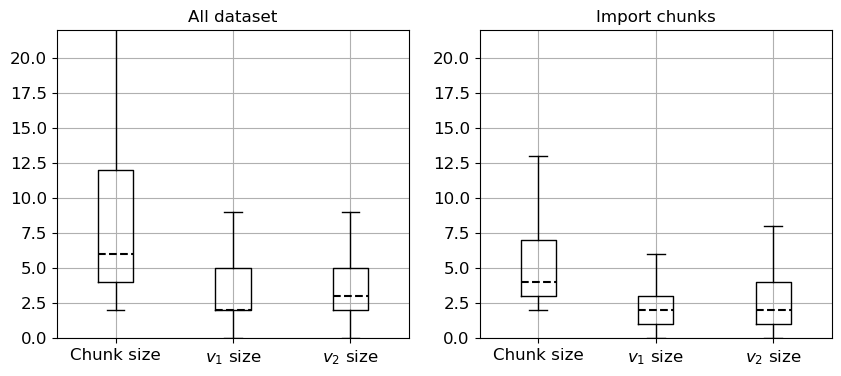

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df.boxplot(['chunk_size', 'v1_size', 'v2_size'], showfliers=False, ax=ax[0], color = 'k', medianprops=dict(linestyle='--', linewidth=1.5, color='k'))
ax[0].tick_params(axis="x", labelsize=12)
ax[0].tick_params(axis="y", labelsize=12)
ax[0].set_ylim(0, 22)
ax[0].set_xticklabels(['Chunk size', '$v_{1}$ size', '$v_{2}$ size'])
ax[0].set_title('All dataset')

import_chunks.boxplot(['chunk_size', 'v1_size', 'v2_size'], showfliers=False, ax=ax[1], color = 'k', medianprops=dict(linestyle='--', linewidth=1.5, color='k'))
ax[1].tick_params(axis="x", labelsize=12)
ax[1].tick_params(axis="y", labelsize=12)
ax[1].set_ylim(0, 22)
ax[1].set_xticklabels(['Chunk size', '$v_{1}$ size', '$v_{2}$ size'])
ax[1].set_title('Import chunks')

plt.show()

### What about the remaining chunks? What is the distribution of their kind?

In [16]:
not_import_chunks = df[df['kind_conflict']!='Import']
not_import_chunks

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size,kind_conflict
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0,True,18,12,"If statement, Method invocation, Return statem..."
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0,True,113,101,"Attribute, Comment, If statement, Method decla..."
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0,True,6,5,"Attribute, Method invocation"
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0,True,5,3,Method invocation
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0,True,6,5,"Method signature, Static initializer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13432,1652324,0.50,0.50,0.50,0.50,0.00,v1 v2,0,1,0.00,50.00,1,2,1.0,True,3,2,"Method signature, Try statement"
13433,1652325,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,50.00,2,2,0.0,True,4,2,"If statement, Variable"
13566,1658634,0.71,0.71,0.50,0.50,0.43,v2 (v1_2) v1 (v1_2) v2,2,0,28.57,0.00,7,5,-2.0,True,13,7,Attribute
13567,1658665,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,50.00,2,2,0.0,True,4,3,Attribute


In [17]:
df['kind_conflict'].value_counts(normalize=True).head(20)

Import                                                0.254888
Method invocation, Variable                           0.066424
Method invocation                                     0.053650
Attribute, Method invocation                          0.037044
Attribute                                             0.031738
If statement, Method invocation, Variable             0.026236
If statement, Method invocation                       0.025155
Comment, Method invocation, Variable                  0.015329
Comment                                               0.015230
Comment, Method invocation                            0.015230
Attribute, Comment                                    0.015034
Method invocation, Method signature                   0.011890
Annotation, Method signature                          0.010219
Comment, If statement, Method invocation, Variable    0.010219
Method invocation, Method signature, Variable         0.010023
Method declaration, Method signature                  0

### What is the percentage of chunks that violate the partial order for the top 10  most frequent kinds of conflict?

In [18]:
df[df['kind_conflict']=='Method invocation, Variable']['partial_order'].value_counts()

True     674
False      2
Name: partial_order, dtype: int64

In [19]:
kinds_frequent = list(df['kind_conflict'].value_counts(normalize=True).head(5).index)
kinds_frequent

['Import',
 'Method invocation, Variable',
 'Method invocation',
 'Attribute, Method invocation',
 'Attribute']

In [20]:
data = []
# for kind_conflict in df['kind_conflict'].unique():
for kind_conflict in kinds_frequent:
    chunks = df[df['kind_conflict']==kind_conflict]
    violate_count = len(chunks[chunks['partial_order']=='False'])
    perc_violation = (violate_count / len(chunks)) * 100
    data.append([kind_conflict, perc_violation, len(chunks)])

In [21]:
df_data = pd.DataFrame(data, columns=['kind_conflict', 'percentage violation', 'chunks'])

In [22]:
df_data[df_data['chunks']>10].sort_values('percentage violation', ascending=False).head(20)

,kind_conflict,percentage violation,chunks
0,Import,1.580571,2594
4,Attribute,0.309598,323
1,"Method invocation, Variable",0.295858,676
2,Method invocation,0.183150,546
3,"Attribute, Method invocation",0.000000,377


In [23]:
v1v2 = analysis_util.get_chunk_composition_pattern_data('v1 v2', df)
v2v1 = analysis_util.get_chunk_composition_pattern_data('v2 v1', df)
v1_only = analysis_util.get_chunk_composition_pattern_data('v1', df)
v2_only = analysis_util.get_chunk_composition_pattern_data('v2', df)

In [24]:
v1_only['kind_conflict'].value_counts(normalize=True).head(20)

Import                                           0.451353
Method invocation                                0.047549
Attribute                                        0.046086
Attribute, Method invocation                     0.044623
Method invocation, Variable                      0.035845
Attribute, Comment                               0.025604
Comment, Method invocation                       0.021946
Method declaration                               0.018288
Comment, Method invocation, Variable             0.013899
If statement, Method invocation                  0.011704
Comment, Method declaration                      0.010973
Other                                            0.010241
Comment, Import                                  0.010241
Variable                                         0.009510
Annotation, Comment, Method declaration          0.009510
Annotation, Attribute                            0.008778
Annotation, Method declaration                   0.008778
Comment       

In [25]:
v2_only['kind_conflict'].value_counts(normalize=True).head(20)

Import                                       0.477778
Method invocation, Variable                  0.034127
Attribute                                    0.033333
Method invocation                            0.033333
Attribute, Method invocation                 0.031746
Comment, Method declaration                  0.019048
Method declaration                           0.019048
Attribute, Comment                           0.019048
Annotation, Method declaration               0.016667
If statement, Method invocation              0.015873
Comment                                      0.015079
Method declaration, Method signature         0.013492
Comment, Method invocation                   0.012698
Comment, Method invocation, Variable         0.011905
If statement, Method invocation, Variable    0.011111
Annotation, Comment, Method declaration      0.011111
Comment, Import                              0.009524
Attribute, Comment, Method invocation        0.007143
Comment, Method signature   

In [26]:
v1v2['kind_conflict'].value_counts(normalize=True).head(20)

Import                                                0.209189
Method invocation, Variable                           0.104968
Method invocation                                     0.079193
Attribute, Method invocation                          0.055286
Attribute                                             0.047441
If statement, Method invocation, Variable             0.028764
If statement, Method invocation                       0.023534
Comment, Method invocation, Variable                  0.017183
Method invocation, Method signature, Variable         0.015689
Attribute, Comment                                    0.015316
Attribute, Method invocation, Variable                0.013448
Attribute, Comment, Method invocation                 0.013448
Comment, Method invocation                            0.013448
If statement                                          0.013074
Method declaration, Method signature                  0.011954
Variable                                              0

In [27]:
v2v1['kind_conflict'].value_counts(normalize=True).head(20)

Import                                                               0.144768
Method invocation, Variable                                          0.095557
Method invocation                                                    0.075490
Attribute, Method invocation                                         0.042045
Method invocation, Method signature                                  0.039178
Annotation, Method signature                                         0.035834
If statement, Method invocation, Variable                            0.032011
If statement, Method invocation                                      0.028189
Attribute                                                            0.026756
Comment, Method invocation, Variable                                 0.020545
Comment                                                              0.017678
Comment, Method invocation                                           0.017200
Method invocation, Method signature, Variable                   

In [28]:
# confidence v1_only -> constructs
# confidence X -> Y = percentage of transactions that satisfy X and Y
# A = construct
# B = pattern
data = []
for index, value in v1_only['kind_conflict'].value_counts().items():
    amount_kind = len(df[df['kind_conflict']==index])
    data.append([index, 'v1_only',  value, value/amount_kind, value/len(v1_only)])
for index, value in v2_only['kind_conflict'].value_counts().items():
    amount_kind = len(df[df['kind_conflict']==index])
    data.append([index, 'v2_only',  value, value/amount_kind, value/len(v2_only)])
for index, value in v1v2['kind_conflict'].value_counts().items():
    amount_kind = len(df[df['kind_conflict']==index])
    data.append([index, 'v1v2',  value, value/amount_kind, value/len(v1v2)])
for index, value in v2v1['kind_conflict'].value_counts().items():
    amount_kind = len(df[df['kind_conflict']==index])
    data.append([index, 'v2v1',  value, value/amount_kind, value/len(v2v1)])
confidence = pd.DataFrame(data, columns=['construct (A)', 'pattern (B)', 'occurrences', 'confidence(A->B)', 'confidence(B->A)'])

In [29]:
confidence.sort_values('occurrences', ascending=False)

,construct (A),pattern (B),occurrences,confidence(A->B),confidence(B->A)
0,Import,v1_only,617,0.237857,0.451353
150,Import,v2_only,602,0.232074,0.477778
302,Import,v1v2,560,0.215883,0.209189
580,Import,v2v1,303,0.116808,0.144768
303,"Method invocation, Variable",v1v2,281,0.415680,0.104968
...,...,...,...,...,...
500,"If statement, Method invocation, While statement",v1v2,1,0.500000,0.000374
499,"Case statement, If statement, Method invocatio...",v1v2,1,1.000000,0.000374
498,"Cast expression, For statement, If statement, ...",v1v2,1,0.200000,0.000374
497,"Annotation, Class signature, Method declaration",v1v2,1,0.333333,0.000374


In [30]:
confidence[confidence['construct (A)']=='Annotation, Method signature']

,construct (A),pattern (B),occurrences,confidence(A->B),confidence(B->A)
56,"Annotation, Method signature",v1_only,2,0.019231,0.001463
196,"Annotation, Method signature",v2_only,3,0.028846,0.002381
323,"Annotation, Method signature",v1v2,22,0.211538,0.008218
585,"Annotation, Method signature",v2v1,75,0.721154,0.035834


In [31]:
# support -> how frequently the item appears in the dataset
data = []
for index, value in df['kind_conflict'].value_counts().items():
    data.append([index, value, value/len(df)])
support_construct = pd.DataFrame(data, columns=['construct', 'occurrences', 'support'])

In [32]:
support_construct.head()

,construct,occurrences,support
0,Import,2594,0.254888
1,"Method invocation, Variable",676,0.066424
2,Method invocation,546,0.053650
3,"Attribute, Method invocation",377,0.037044
4,Attribute,323,0.031738


In [33]:
# support -> how frequently the item appears in the dataset
data = []
data.append(['v1_only', len(v1_only), len(v1_only)/len(df)])
data.append(['v2_only', len(v2_only), len(v2_only)/len(df)])
data.append(['v1v2', len(v1v2), len(v1v2)/len(df)])
data.append(['v2v1', len(v2v1), len(v2v1)/len(df)])
support_pattern = pd.DataFrame(data, columns=['pattern', 'occurrences', 'support'])

In [34]:
support_pattern

,pattern,occurrences,support
0,v1_only,1367,0.134322
1,v2_only,1260,0.123809
2,v1v2,2677,0.263044
3,v2v1,2093,0.205660


In [35]:
constructs = df['kind_conflict'].unique()
patterns = confidence['pattern (B)'].unique()
data = []
for construct in constructs:
    for pattern in patterns:
        # confidence construct -> pattern
        
        filtered = confidence[(confidence['construct (A)']==construct) & (confidence['pattern (B)']==pattern)]
        if len(filtered) > 0:
            confidence_ab = filtered.iloc[0]['confidence(A->B)']
            confidence_ba = filtered.iloc[0]['confidence(B->A)']
            support_a = support_construct[support_construct['construct']==construct].iloc[0]['support']
            support_b = support_pattern[support_pattern['pattern']==pattern].iloc[0]['support']
            occurrences = filtered.iloc[0]['occurrences']
            lift = confidence_ab/support_b
            rule = f'{construct} -> {pattern}'
            data.append([rule, confidence_ab, confidence_ba, support_a, support_b, occurrences, lift])
lift = pd.DataFrame(data, columns=['rule (A->B)', 'confidence(A->B)', 'confidence(B->A)',
                                   'support(A)', 'support(B)', 'occurrences', 'lift'])

In [36]:
#lift(A->B) = confidence(A->B)/support(B)
lift[lift['occurrences'] > 50].sort_values('lift', ascending=False).head(50)

,rule (A->B),confidence(A->B),confidence(B->A),support(A),support(B),occurrences,lift
32,"Annotation, Method signature -> v2v1",0.721154,0.035834,0.010219,0.205660,75,3.506537
336,"Method invocation, Method signature -> v2v1",0.677686,0.039178,0.011890,0.205660,82,3.295179
18,Import -> v2_only,0.232074,0.477778,0.254888,0.123809,602,1.874458
17,Import -> v1_only,0.237857,0.451353,0.254888,0.134322,617,1.770788
15,"Method invocation, Variable -> v1v2",0.415680,0.104968,0.066424,0.263044,281,1.580269
77,Attribute -> v1v2,0.393189,0.047441,0.031738,0.263044,127,1.494764
2,"Attribute, Method invocation -> v1v2",0.392573,0.055286,0.037044,0.263044,148,1.492422
6,Method invocation -> v1v2,0.388278,0.079193,0.053650,0.263044,212,1.476096
75,Attribute -> v1_only,0.195046,0.046086,0.031738,0.134322,63,1.452076
16,"Method invocation, Variable -> v2v1",0.295858,0.095557,0.066424,0.205660,200,1.438579


In [37]:
lift[lift['occurrences'] > 50].sort_values('lift').head(10)

,rule (A->B),confidence(A->B),confidence(B->A),support(A),support(B),occurrences,lift
20,Import -> v2v1,0.116808,0.144768,0.254888,0.205660,303,0.567967
19,Import -> v1v2,0.215883,0.209189,0.254888,0.263044,560,0.820709
78,Attribute -> v2v1,0.173375,0.026756,0.031738,0.205660,56,0.843016
4,Method invocation -> v1_only,0.119048,0.047549,0.053650,0.134322,65,0.886282
70,"If statement, Method invocation -> v1v2",0.246094,0.023534,0.025155,0.263044,63,0.935561
56,"If statement, Method invocation, Variable -> v1v2",0.288390,0.028764,0.026236,0.263044,77,1.096354
71,"If statement, Method invocation -> v2v1",0.230469,0.028189,0.025155,0.205660,59,1.120631
3,"Attribute, Method invocation -> v2v1",0.233422,0.042045,0.037044,0.205660,88,1.134990
0,"Attribute, Method invocation -> v1_only",0.161804,0.044623,0.037044,0.134322,61,1.204591
57,"If statement, Method invocation, Variable -> v2v1",0.250936,0.032011,0.026236,0.205660,67,1.220152


In [46]:
inspect_rule = df[(df['kind_conflict']=='Annotation, Method signature') & (df['chunk_composition'] == ' v2 v1')]
inspect_rule

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size,kind_conflict
813,797178,0.5,0.5,0.5,0.5,0.0,v2 v1,0,1,0.0,50.0,1,2,1.0,True,3,2,"Annotation, Method signature"
816,797194,0.5,0.5,0.5,0.5,0.0,v2 v1,0,1,0.0,50.0,1,2,1.0,True,3,2,"Annotation, Method signature"
819,797207,0.5,0.5,0.5,0.5,0.0,v2 v1,0,1,0.0,50.0,1,2,1.0,True,3,2,"Annotation, Method signature"
821,797214,0.5,0.5,0.5,0.5,0.0,v2 v1,0,1,0.0,50.0,1,2,1.0,True,3,2,"Annotation, Method signature"
822,797217,0.5,0.5,0.5,0.5,0.0,v2 v1,0,1,0.0,50.0,1,2,1.0,True,3,2,"Annotation, Method signature"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11464,1392175,0.5,0.5,0.5,0.5,0.0,v2 v1,0,1,0.0,50.0,1,2,1.0,True,3,2,"Annotation, Method signature"
11465,1392176,0.5,0.5,0.5,0.5,0.0,v2 v1,0,1,0.0,50.0,1,2,1.0,True,3,2,"Annotation, Method signature"
11467,1392178,0.5,0.5,0.5,0.5,0.0,v2 v1,0,1,0.0,50.0,1,2,1.0,True,3,2,"Annotation, Method signature"
12355,1420474,0.5,0.5,0.5,0.5,0.0,v2 v1,0,1,0.0,50.0,1,2,1.0,True,3,2,"Annotation, Method signature"


In [47]:
inspect_rule.describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,7.500000e+01,75.000000,75.000000,75.000000,75.000000,75.0,75.000000,75.0,75.000000,75.0,75.000000,75.0,75.000000,75.000000,75.00000
mean,9.214011e+05,0.504533,0.495467,0.504533,0.495467,0.0,0.013333,1.0,0.666667,50.0,1.040000,2.0,0.960000,3.080000,2.08000
std,2.126941e+05,0.027573,0.027573,0.027573,0.027573,0.0,0.115470,0.0,5.773503,0.0,0.197279,0.0,0.197279,0.318781,0.27312
min,7.971780e+05,0.500000,0.330000,0.500000,0.330000,0.0,0.000000,1.0,0.000000,50.0,1.000000,2.0,0.000000,3.000000,2.00000
25%,7.972830e+05,0.500000,0.500000,0.500000,0.500000,0.0,0.000000,1.0,0.000000,50.0,1.000000,2.0,1.000000,3.000000,2.00000
50%,7.974650e+05,0.500000,0.500000,0.500000,0.500000,0.0,0.000000,1.0,0.000000,50.0,1.000000,2.0,1.000000,3.000000,2.00000
75%,1.012306e+06,0.500000,0.500000,0.500000,0.500000,0.0,0.000000,1.0,0.000000,50.0,1.000000,2.0,1.000000,3.000000,2.00000
max,1.420505e+06,0.670000,0.500000,0.670000,0.500000,0.0,1.000000,1.0,50.000000,50.0,2.000000,2.0,1.000000,5.000000,3.00000


In [48]:
all_chunks_attributes[all_chunks_attributes['chunk_id'].isin(inspect_rule['chunk_id'])].groupby(['project']).count().sort_values(by='chunk_id', ascending=False)

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project_user,project_name,path,...,Same devs,Devs intersection,Commits 1,Commits 2,Changed files 1,Changed files 2,Changed files intersection,self_conflict_perc,has_branch_merge_message_indicator,has_multiple_devs_on_each_side
project,,,,,,,,,,,,,,,,,,,,,
freenet/fred,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
jgf/wala-mirror,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
wala/WALA,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
alexo/wro4j,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
realm/realm-java,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
CloudStack-extras/CloudStack-archive,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
errai/errai,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
freenet/plugin-Freemail,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
freenet/plugin-WebOfTrust,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [41]:
fred_ids = all_chunks_attributes[all_chunks_attributes['project']=='freenet/fred']['chunk_id'].unique()

In [42]:
df[df['kind_conflict']=='If statement, Method invocation'].sample(10)

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size,kind_conflict
10242,1298002,0.75,0.50,0.62,0.38,0.25,v2 v1 (v1_2) v1,0,0,0.00,0.00,3,2,-1.0,True,5,4,"If statement, Method invocation"
10496,1309912,0.00,1.00,0.00,1.00,0.00,v2,0,1,0.00,25.00,0,4,4.0,True,4,3,"If statement, Method invocation"
1100,806924,1.00,0.00,1.00,0.00,0.00,v1,5,1,83.33,100.00,6,1,-5.0,True,8,1,"If statement, Method invocation"
3194,938534,0.14,0.86,0.14,0.86,0.00,v2 v1,0,3,0.00,33.33,1,9,8.0,True,10,7,"If statement, Method invocation"
11309,1383856,0.40,0.60,0.40,0.60,0.00,v1 v2,2,2,50.00,40.00,4,5,1.0,True,9,5,"If statement, Method invocation"
805,796734,0.50,0.50,0.50,0.50,0.00,v2 v1,0,1,0.00,33.33,2,3,1.0,True,5,4,"If statement, Method invocation"
9484,1189552,0.67,0.33,0.67,0.33,0.00,v1 v2 v1,1,0,33.33,0.00,3,1,-2.0,True,5,3,"If statement, Method invocation"
7720,1113854,0.50,0.50,0.50,0.50,0.00,v1 v2,1,2,50.00,66.67,2,3,1.0,True,5,2,"If statement, Method invocation"
3196,938539,0.14,0.86,0.14,0.86,0.00,v2 v1,0,3,0.00,33.33,1,9,8.0,True,10,7,"If statement, Method invocation"
7474,1106791,0.50,0.50,0.50,0.50,0.00,v1 v2,1,4,50.00,80.00,2,5,3.0,True,7,2,"If statement, Method invocation"


In [43]:
kind_conflicts = df['kind_conflict'].unique()
unique_constructs = set()
for kind_conflict in kind_conflicts:
    individual_constructs = kind_conflict.split(",")
    for individual_construct in individual_constructs:
        unique_constructs.add(individual_construct.strip())
unique_constructs

{'Annotation',
 'Annotation declaration',
 'Array access',
 'Array initializer',
 'Assert statement',
 'Attribute',
 'Break statement',
 'Case statement',
 'Cast expression',
 'Catch clause',
 'Class declaration',
 'Class signature',
 'Comment',
 'Continue statement',
 'Do statement',
 'Enum declaration',
 'Enum signature',
 'Enum value',
 'For statement',
 'If statement',
 'Import',
 'Interface declaration',
 'Interface signature',
 'Method declaration',
 'Method interface',
 'Method invocation',
 'Method signature',
 'Other',
 'Package declaration',
 'Return statement',
 'Static initializer',
 'Switch statement',
 'Synchronized statement',
 'Throw statement',
 'Try statement',
 'TypeDeclarationStatement',
 'Variable',
 'While statement'}

### Number of chunks with each language construct type

In [44]:
data = []
for unique_construct in unique_constructs:
    data.append([unique_construct, len(df[df['kind_conflict'].str.contains(unique_construct)])])
chunks_per_construct = pd.DataFrame(data, columns=['Language construct', 'Number of chunks'])
chunks_per_construct.sort_values('Number of chunks', ascending=False).style.hide_index()

/var/folders/11/0ktfx6n1245byx39x7p8r7lw0000gn/T/ipykernel_29766/4261185086.py:5: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  chunks_per_construct.sort_values('Number of chunks', ascending=False).style.hide_index()


Language construct,Number of chunks
Method invocation,5005
Variable,2765
Import,2735
Comment,2158
Attribute,2029
If statement,1813
Method signature,1570
Method declaration,917
Annotation,846
Return statement,543


In [54]:
# df[df['kind_conflict'].str.contains('Package')].sample(10)
df[df['chunk_id']==1361290]

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size,kind_conflict
10967,1361290,0.5,0.5,0.5,0.5,0.0,v1 v2,0,1,0.0,50.0,1,2,1.0,True,3,2,"Cast expression, Method invocation, Variable"
